# Apresentação

<a href src="https://www.kaggle.com/datasets/javagarm/fifa-19-complete-player-dataset">
<img src="https://s2.glbimg.com/V7249rL9MNWhMckASzn9eXwSDIA=/0x0:1920x1080/984x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_08fbf48bc0524877943fe86e43087e7a/internal_photos/bs/2019/g/h/w1BZ0sTpuURRdlnxBaag/fifa-19-intros.jpg" width="500" weight="500" style="vertical-align:middle;margin:50px 0px"></a>

Este projeto é em conjunto do meu recente artigo do <a href src="https://medium.com/@data.guga/qualquer-semelhan%C3%A7a-%C3%A9-mera-coincid%C3%AAncia-sql-e-pandas-5b33c1551a23"> Medium</a> sobre todos os jogadores do FIFA19, utilizando comandos do Pandas semelhantes aos de SQL.

Nesse notebook adicionamos outras análises maiores detalhes de como podemos realizar uma análise a partir do artigo publicado.

Aproveitando o dataset, conseguimos responder as seguintes perguntas:
1. Qual o país tem maior quantidade de jogadores no jogo?
2. Existem dados nulos ou ausentes?
3. A maior média de Overall está em que clube?
4. Quais os jogadores que possuem maior ganho de Overall?

# 1.0 - Bibliotecas


In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1.1 Funções - Módulos

In [2]:
# Modulo shape

def shape(df):

    # calcula o shape dos tabela_full
    shape_df = df.shape

    # linhas
    linhas = shape_df[0]

    # colunas
    colunas = shape_df[1]

    # resultado
    print(f'O dataset possui {linhas} linhas e {colunas} colunas.')

In [3]:
# Modulo tabela de valores nulos

def nulos(df):

    tabela_full_nulos = df.isnull().sum()

    tabela_full_nulos_calc = (100 * tabela_full_nulos) / df.shape[0] 

    tabela_full_tipos = df.dtypes

    tabela_nulos = pd.concat([tabela_full_nulos, tabela_full_nulos_calc, tabela_full_tipos], axis=1)

    tabela_nulos_colunas = tabela_nulos.rename(columns={0: 'Qtd.', 1: 'Porcentagem (%)', 2: 'Dtype'}).sort_values(by='Porcentagem (%)' ,ascending=False)

    display(tabela_nulos_colunas)

# 2.0 - Dataset

In [4]:
# Carregando os dados
fifa = pd.read_csv('https://raw.githubusercontent.com/dataPalacio/estudo_pandas/main/fifa19.csv', sep=',')
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# 3.0 - Analise exploratória

In [5]:
# Conhecedo cada os tipos de tabela_full
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [6]:
# Lista de colunas do dataset
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
# Dimensão do dataset
shape(fifa)

O dataset possui 18207 linhas e 89 colunas.


In [8]:
# Verificando a quantidade de valores nulos na tabela
fifa.isnull().sum().sort_values(ascending=False)

Loaned From    16943
LWB             2085
LCM             2085
RS              2085
LW              2085
               ...  
Nationality        0
Photo              0
Age                0
Name               0
Unnamed: 0         0
Length: 89, dtype: int64

In [9]:
nulos(fifa)

,Qtd.,Porcentagem (%),Dtype
Loaned From,16943,93.057615,object
LWB,2085,11.451639,object
LCM,2085,11.451639,object
RS,2085,11.451639,object
LW,2085,11.451639,object
...,...,...,...
Nationality,0,0.000000,object
Photo,0,0.000000,object
Age,0,0.000000,int64
Name,0,0.000000,object


In [10]:
# Quantos brasileiros temos no FIFA19?
brasukas = fifa[fifa['Nationality'] == 'Brazil'].shape
print(f'O jogo possui o total de {brasukas[0]} jogadores brasileiros')

O jogo possui o total de 827 jogadores brasileiros


In [11]:
# Quantos países possuem jogadores no FIFA?
fifa['Nationality'].value_counts().count()

164

# 4.0 - Análise univariada e multivariada

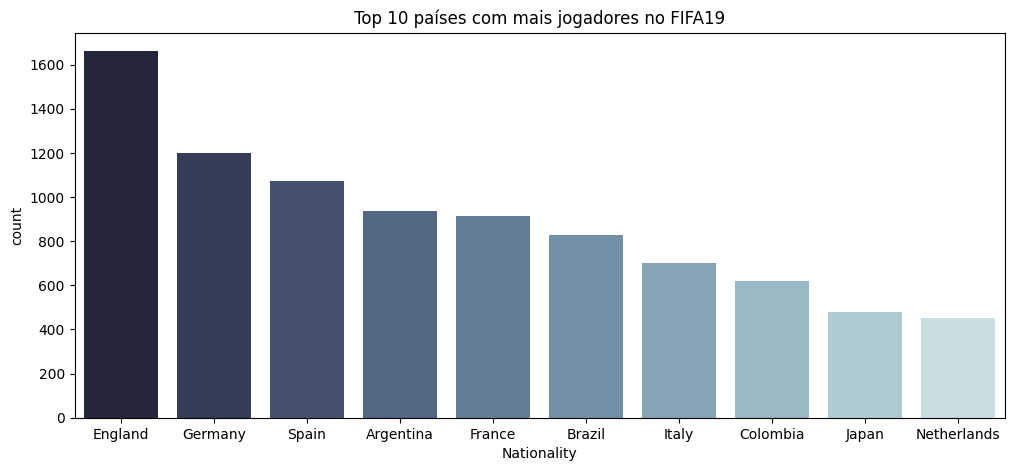

In [12]:
# Gráfico dos top 10 clubes com maior média de overall

# Ordenando os dados
order_nat = fifa['Nationality'].value_counts().index

# Plotagem do countplot
plt.figure(figsize=(12,5))
plt.title('Top 10 países com mais jogadores no FIFA19')
cores = sns.cubehelix_palette(n_colors=10, rot=-.2, reverse=True)
sns.countplot(data=fifa, x='Nationality', order=order_nat, palette=cores)

plt.xlim(-0.5,9.5)
plt.show()


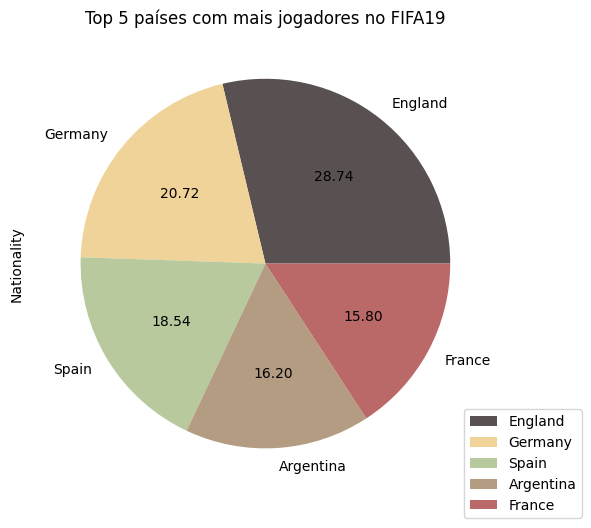

In [13]:
# Quais os 5 países possuem mais jogadores no jogo?
fifa_nationality = fifa['Nationality'].value_counts().head()

# Plotando um gráfico de pizza
fifa_nationality.plot(kind ='pie', figsize=(6,6), autopct='%.2f', 
                    colors=('#595151', '#f0d399', '#b8c99d', '#b39c82', '#ba6868'))
plt.title('Top 5 países com mais jogadores no FIFA19')
plt.legend(bbox_to_anchor=(1.2,0.2))

(<AxesSubplot: title={'center': 'Boxplot da coluna Age'}>,
 Text(0.5, 1.0, 'Boxplot da coluna Age'))

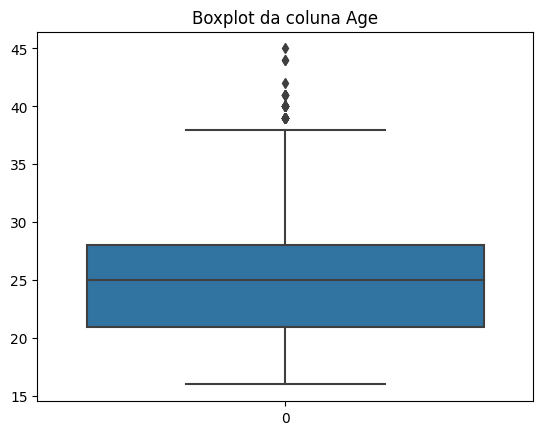

In [14]:
# Analisando os outliers da coluna idade
sns.boxplot(fifa.Age), plt.title('Boxplot da coluna Age')

<AxesSubplot: title={'center': 'Violinplot da idade'}, xlabel='Age'>

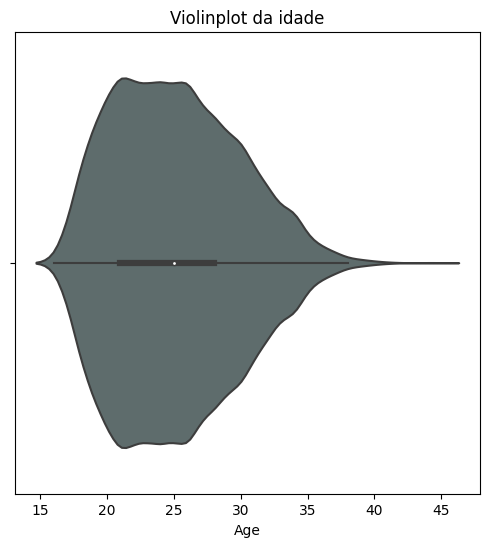

In [15]:
# Qual a faixa de idade com mais jogadores?

plt.figure(figsize=(6,6))
plt.title('Violinplot da idade')
sns.violinplot(x=fifa.Age, color='#5c6e6e')

### <b>Feature Engineering</b>

- Utilizarei feature engineering (engenharia de atributos) para adicionar uma nova coluna para identificar se aquele jogador nasceu em no país que já foi campeão da copa do mundo.

- Você como analista de dados terá que preparar os dados para o cientista realizar as análise com Machine Learning, correto? Você acha que Strings são usadas para as análises? Pois bem, caso você tenha descoberto algo, vai notar o motivo da minha escolha.

Países campeões: Brasil, Alemanha, Itália, Argentina, Uruguai, França, Espanha, Inglaterra <br>
Encoding: 0 = não, 1 = sim

In [16]:
fifa.Nationality

0        Argentina
1         Portugal
2           Brazil
3            Spain
4          Belgium
           ...    
18202      England
18203       Sweden
18204      England
18205      England
18206      England
Name: Nationality, Length: 18207, dtype: object

In [17]:
# Copiando a coluna "Nacionalidade"
fifa['Champions'] = fifa['Nationality'].copy()

In [18]:
fifa['Champions']

0        Argentina
1         Portugal
2           Brazil
3            Spain
4          Belgium
           ...    
18202      England
18203       Sweden
18204      England
18205      England
18206      England
Name: Champions, Length: 18207, dtype: object

In [19]:
# Realizado a imputação dos dados (método não muito prático, porém atende a necessidade)
fifa['Champions'] = fifa['Champions'].replace('Brazil', 1)
fifa['Champions'] = fifa['Champions'].replace('Germany', 1)
fifa['Champions'] = fifa['Champions'].replace('Italy', 1)
fifa['Champions'] = fifa['Champions'].replace('Argentina', 1)
fifa['Champions'] = fifa['Champions'].replace('Uruguay', 1)
fifa['Champions'] = fifa['Champions'].replace('France', 1)
fifa['Champions'] = fifa['Champions'].replace('Spain', 1)
fifa['Champions'] = fifa['Champions'].replace('England', 1)

In [20]:
fifa.Champions.head()

0           1
1    Portugal
2           1
3           1
4     Belgium
Name: Champions, dtype: object

In [21]:
# Incluindo valor nulo da nova coluna "Campeões"
fifa['Champions'] = pd.Series(['1' if val == 1 else '0'
for val in fifa['Champions']], index = fifa.index)

In [22]:
# Validando as alterações
fifa['Champions'] 

0        1
1        0
2        1
3        1
4        0
        ..
18202    1
18203    0
18204    1
18205    1
18206    1
Name: Champions, Length: 18207, dtype: object

<AxesSubplot: title={'center': 'Proporção de países campeões mundiais presentes no jogo'}, ylabel='Champions'>

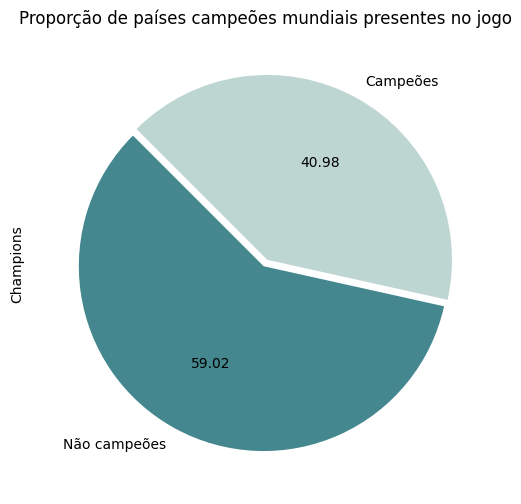

In [23]:
# Grafico de proporção de países campeões mundiais 

plt.figure(figsize=(8,6))
fifa['Champions'].value_counts().plot(
                                      kind='pie', autopct='%.2f',
                                      title='Proporção de países campeões mundiais presentes no jogo',
                                      labels=['Não campeões','Campeões'], 
                                      colors=['#44878f', '#bdd6d2'],
                                      explode=[0.02,0.02],
                                      startangle = 135)




## 4.2 - Analise com filtragem condicional

In [24]:
# Filtrando os tiozão com mais de 30 anos
fifa[fifa['Age'] > 30]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Champions
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,1
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,0
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M,0
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M,1
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17842,17842,182461,Zhou Ting,39,https://cdn.sofifa.org/players/4/19/182461.png,China PR,https://cdn.sofifa.org/flags/155.png,52,52,Dalian YiFang FC,...,17.0,45.0,44.0,10.0,12.0,7.0,15.0,6.0,€22K,0
17866,17866,232676,N. Hatta,32,https://cdn.sofifa.org/players/4/19/232676.png,Japan,https://cdn.sofifa.org/flags/163.png,52,52,Júbilo Iwata,...,30.0,12.0,13.0,54.0,48.0,45.0,52.0,54.0,€38K,0
18043,18043,237917,A. Suzuki,31,https://cdn.sofifa.org/players/4/19/237917.png,Japan,https://cdn.sofifa.org/flags/163.png,50,50,Yokohama F. Marinos,...,13.0,10.0,14.0,49.0,48.0,54.0,52.0,54.0,€25K,0
18171,18171,237746,Y. Uchimura,33,https://cdn.sofifa.org/players/4/19/237746.png,Japan,https://cdn.sofifa.org/flags/163.png,48,48,Hokkaido Consadole Sapporo,...,45.0,48.0,42.0,13.0,15.0,7.0,15.0,15.0,€25K,0


In [25]:
# Filtrando os brazukas
top_over_br = fifa[(fifa['Nationality'] == 'Brazil')][['Name', 'Overall']].nlargest(5, columns='Overall')


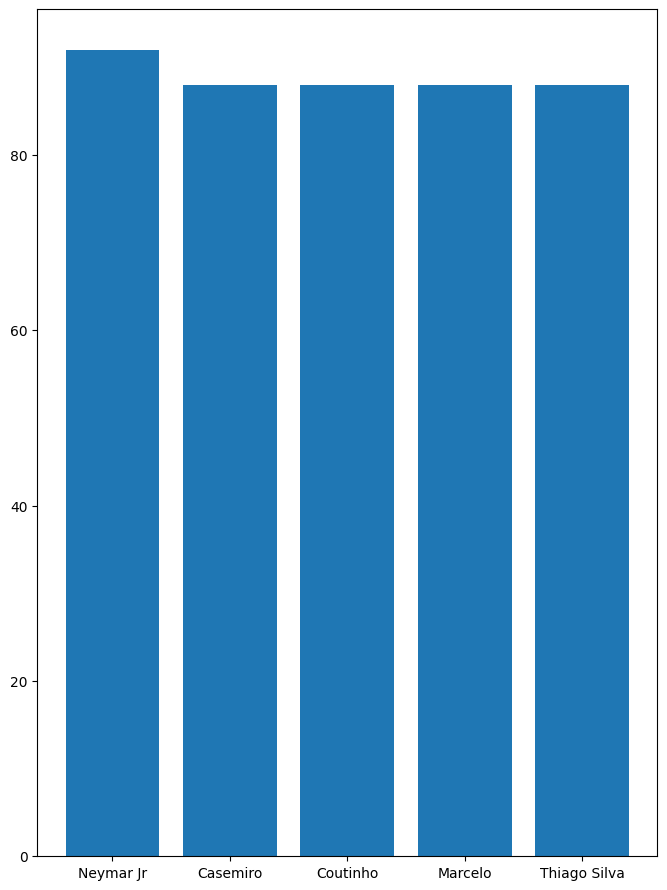

In [26]:
plt.figure(figsize=(8,11))
plt.bar(top_over_br['Name'], top_over_br['Overall'])
plt.show()

## 4.1 Analises com agrupamento de variáveis (groupby)

In [27]:
fifa_overall = fifa.groupby(['Club'])['Overall'].mean().sort_values(ascending=False)
fifa_overall = pd.DataFrame(fifa_overall)

<Figure size 800x300 with 0 Axes>

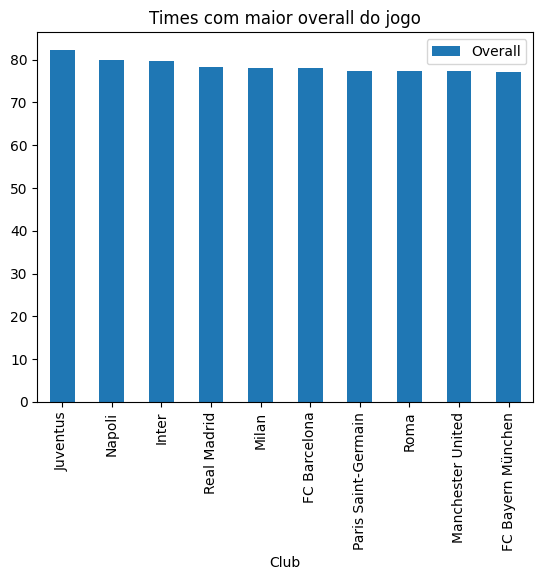

In [28]:
# Analisando o top 10 de times com maior média de Overall
top10_over= fifa_overall.nlargest(10, columns='Overall')

# Plotagem em gráfico de barras
plt.figure(figsize=(8,3))
top10_over.plot(kind='bar')
plt.title('Times com maior overall do jogo')
plt.show()

### Jogadores com maior diferença de Overall e Potential

In [29]:
# Adicionando mais filtros
fifa[(fifa['Overall'] > 90) & (fifa['Age'] > 25)]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Champions
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,1
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,1
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,1
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,0
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,0
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M,0
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M,1
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M,1


In [30]:
tab_f1 = fifa[fifa['Overall'] > 90]
tab_f1.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Champions
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,1
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,1
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,1
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,0


In [31]:
# Jogadores com maior Potential do jogo
top10_potential = fifa[fifa['Potential'] > 90].sort_values(by='Potential' ,ascending=False).nlargest(10, columns='Potential')
top10_potential

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Champions
25,25,231747,K. Mbappé,19,https://cdn.sofifa.org/players/4/19/231747.png,France,https://cdn.sofifa.org/flags/18.png,88,95,Paris Saint-Germain,...,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,€166.1M,1
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,1
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,0
15,15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,...,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,€153.5M,1
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,1
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,1
229,229,230621,G. Donnarumma,19,https://cdn.sofifa.org/players/4/19/230621.png,Italy,https://cdn.sofifa.org/flags/27.png,82,93,Milan,...,20.0,14.0,16.0,88.0,78.0,72.0,78.0,88.0,€55.1M,1
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M,0
156,156,230666,Gabriel Jesus,21,https://cdn.sofifa.org/players/4/19/230666.png,Brazil,https://cdn.sofifa.org/flags/54.png,83,92,Manchester City,...,53.0,23.0,19.0,13.0,8.0,6.0,6.0,15.0,€84.1M,1
155,155,231443,O. Dembélé,21,https://cdn.sofifa.org/players/4/19/231443.png,France,https://cdn.sofifa.org/flags/18.png,83,92,FC Barcelona,...,42.0,30.0,33.0,6.0,6.0,14.0,10.0,13.0,€90M,1


In [33]:
dif_pot = fifa[['Name', 'Potential', 'Overall']]
dif_pot['dif_pot_over'] = fifa['Potential'] - fifa['Overall']
dif_pot = dif_pot.sort_values(by='dif_pot_over', ascending=False)


C:\Users\gusta\AppData\Local\Temp\ipykernel_10312\3021499364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dif_pot['dif_pot_over'] = fifa['Potential'] - fifa['Overall']


In [36]:
dif_pot.head()

,Name,Potential,Overall,dif_pot_over
18072,D. Campbell,76,50,26
16028,J. von Moos,84,58,26
17175,B. Mumba,80,55,25
16629,Y. Lenze,82,57,25
17784,K. Askildsen,77,52,25


Text(0.5, 1.0, 'Jogadores com maior ganho de Potential')

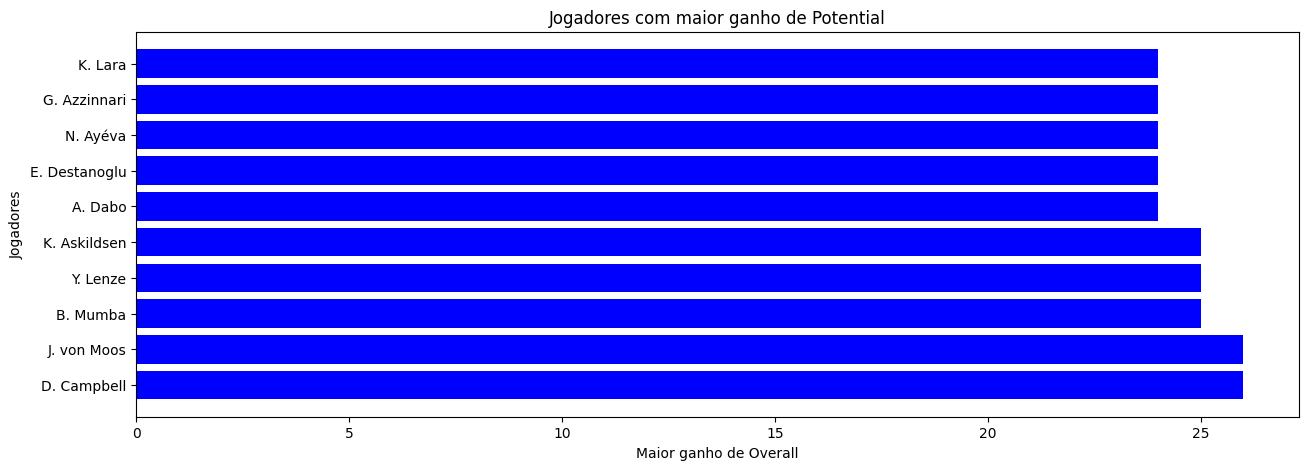

In [49]:
# Preparando os dados
best_dif_potential = dif_pot.nlargest(10, columns='dif_pot_over')
y_value = best_dif_potential['Name']
x_value = best_dif_potential['dif_pot_over']

# Plotagem
fig = plt.figure(figsize=(15,5))
plt.barh(y_value, x_value, color='Blue')
plt.ylabel('Jogadores')
plt.xlabel('Maior ganho de Overall')
plt.title('Jogadores com maior ganho de Potential')


# TESTE